<a href="https://www.kaggle.com/code/nicolegheysens/hw7stateradiodata?scriptVersionId=212920529" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ms-radio-data/fcc_db_MS_selected.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/kaggle/input/ms-radio-data/fcc_db_MS_selected.csv') 

In [4]:
display(df.head())

,frequency,callsign,city,sp,antenna_type,erp,lat,lon,class,slogan,haat,owner,format,market
0,105.3,WCNS-LP,COLLINS,MS,NDIR,0.015,31.634611,89.573139,LP100,RENEW RADIO,75.00,RENEW Collins,Contemporary Christian,NaN
1,101.1,KJMS,OLIVE BRANCH,MS,NDIR,100.000,35.222861,90.043417,C1,V 101,171.00,iHeartMedia,Urban AC,Memphis
2,89.7,KUMB,HOLLYWOOD,MS,NDIR,1.000,34.757750,90.393722,A,PODEROSA 89.7,36.86,Unica Media Broadcasting Inc.,Spanish,NaN
3,88.3,W202BS,COLUMBIA,MS,NDIR,0.013,31.264056,89.929806,D,THE SONLIFE RADIO NETWORK,99.00,"FAMILY WORSHIP CENTER CHURCH, INC.",Religious Teaching,NaN
4,88.7,W204BT,MERIDIAN,MS,NDIR,0.010,32.354028,88.632833,D,REJOICE RADIO,151.40,CSN INTERNATIONAL,Religious Teaching,NaN


In [5]:
print(df.shape)
print(df.columns)
print(df.dtypes)

(294, 14)
Index(['frequency', 'callsign', 'city', 'sp', 'antenna_type', 'erp', 'lat',
       'lon', 'class', 'slogan', 'haat', 'owner', 'format', 'market'],
      dtype='object')
frequency       float64
callsign         object
city             object
sp               object
antenna_type     object
erp             float64
lat             float64
lon             float64
class            object
slogan           object
haat            float64
owner            object
format           object
market           object
dtype: object


In [6]:
filtered_df = df[df['frequency'] < 92.1]
filtered_df.head()

,frequency,callsign,city,sp,antenna_type,erp,lat,lon,class,slogan,haat,owner,format,market
2,89.7,KUMB,HOLLYWOOD,MS,NDIR,1.000,34.757750,90.393722,A,PODEROSA 89.7,36.86,Unica Media Broadcasting Inc.,Spanish,NaN
3,88.3,W202BS,COLUMBIA,MS,NDIR,0.013,31.264056,89.929806,D,THE SONLIFE RADIO NETWORK,99.00,"FAMILY WORSHIP CENTER CHURCH, INC.",Religious Teaching,NaN
4,88.7,W204BT,MERIDIAN,MS,NDIR,0.010,32.354028,88.632833,D,REJOICE RADIO,151.40,CSN INTERNATIONAL,Religious Teaching,NaN
5,89.7,W209CF,GULFPORT,MS,NDIR,0.120,30.434639,89.029750,D,RADIO BY GRACE,39.80,"RADIO BY GRACE, INC.",Religious Teaching,Biloxi-Gulfport-Pascagoula
6,90.7,W214BE,JACKSON,MS,NDIR,0.055,32.285833,90.211944,D,RADIO BY GRACE,141.20,"Radio By Grace, Inc.",Religious Teaching,"Jackson, MS"


In [7]:
from math import radians, sin, cos, sqrt, atan2

def haversine(lat1, lon1, lat2, lon2):
    R = 3958.8
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = sin(dlat/2)**2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    return R * c

central_coords = (32.2988, -90.1848)
df['distance_to_capital_miles'] = df.apply(lambda row: haversine(row['lat'], row['lon'], *central_coords), axis=1)
df.head()

,frequency,callsign,city,sp,antenna_type,erp,lat,lon,class,slogan,haat,owner,format,market,distance_to_capital_miles
0,105.3,WCNS-LP,COLLINS,MS,NDIR,0.015,31.634611,89.573139,LP100,RENEW RADIO,75.00,RENEW Collins,Contemporary Christian,NaN,8019.487548
1,101.1,KJMS,OLIVE BRANCH,MS,NDIR,100.000,35.222861,90.043417,C1,V 101,171.00,iHeartMedia,Urban AC,Memphis,7771.565500
2,89.7,KUMB,HOLLYWOOD,MS,NDIR,1.000,34.757750,90.393722,A,PODEROSA 89.7,36.86,Unica Media Broadcasting Inc.,Spanish,NaN,7803.573220
3,88.3,W202BS,COLUMBIA,MS,NDIR,0.013,31.264056,89.929806,D,THE SONLIFE RADIO NETWORK,99.00,"FAMILY WORSHIP CENTER CHURCH, INC.",Religious Teaching,NaN,8045.112663
4,88.7,W204BT,MERIDIAN,MS,NDIR,0.010,32.354028,88.632833,D,REJOICE RADIO,151.40,CSN INTERNATIONAL,Religious Teaching,NaN,7969.142446


In [8]:
grouped = df.groupby('format')['frequency'].mean()
grouped

format
Adult Alternative                      95.300000
Adult Contemporary                    100.785714
Adult Standards                       102.500000
Blues                                  97.500000
Classic Hip-Hop                        94.800000
Classic Hits                           98.063636
Classic Rock                          100.733333
Contemporary Christian                 97.308333
Contemporary Hit Radio                 99.840000
Country                               100.016279
Country/Talk                          106.900000
Easy Listening                        106.900000
Gospel Music                           97.340000
Hot AC                                 98.585714
News                                  102.900000
News/Classical                         89.900000
News/Jazz                              88.500000
News/Talk                              96.900000
Oldies                                100.150000
R&B Oldies                            102.100000
Religion/Talk

In [9]:
market_counts = df['market'].value_counts().head(5)
market_counts


market
Jackson, MS                   42
Biloxi-Gulfport-Pascagoula    23
Laurel-Hattiesburg            19
Memphis                        8
Name: count, dtype: int64

In [10]:
pivot_table = df.pivot_table(index='market', columns='format', values='frequency', aggfunc='mean')
pivot_table

format,Adult Contemporary,Adult Standards,Blues,Classic Hip-Hop,Classic Hits,Classic Rock,Contemporary Christian,Contemporary Hit Radio,Country,Gospel Music,...,Rock,Sports,Talk,Talk/Sports,Urban AC,Urban Contemporary,Urban Contemporary/Urban Gospel,Urban Gospel,Urban Oldies,Variety
market,,,,,,,,,,,,,,,,,,,,,
Biloxi-Gulfport-Pascagoula,93.7,NaN,NaN,96.7,NaN,92.5,107.10,105.9,99.600000,104.3,...,97.9,NaN,104.0,NaN,94.500000,NaN,NaN,98.7,NaN,99.9
"Jackson, MS",98.7,102.5,96.1,NaN,94.3,106.7,94.75,101.7,97.566667,NaN,...,93.1,106.1,99.9,NaN,102.366667,101.8,105.5,99.5,NaN,104.3
Laurel-Hattiesburg,94.3,NaN,NaN,NaN,NaN,104.5,NaN,100.3,105.900000,97.1,...,NaN,92.7,97.3,98.1,102.500000,99.2,NaN,105.3,97.7,88.5
Memphis,NaN,NaN,NaN,NaN,NaN,NaN,98.30,NaN,95.300000,92.7,...,NaN,NaN,NaN,NaN,101.100000,NaN,NaN,95.7,NaN,88.1


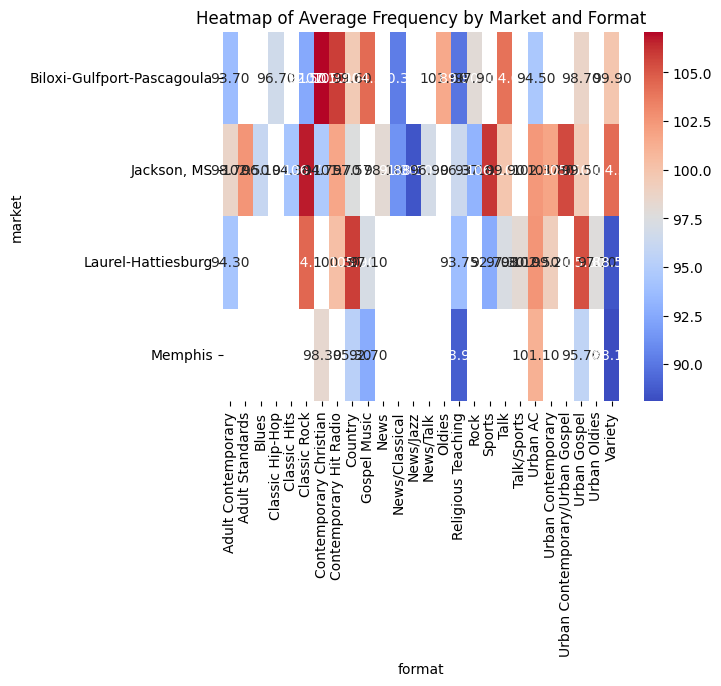

In [11]:
import seaborn as sns
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap of Average Frequency by Market and Format")
plt.show()

In [12]:
stats = df['distance_to_capital_miles'].describe()
print(stats)

count     294.000000
mean     7947.659453
std        89.080719
min      7771.565500
25%      7875.030262
50%      7967.481237
75%      8023.271005
max      8110.864629
Name: distance_to_capital_miles, dtype: float64
